In [122]:
from train.data.dataframe import generate_dfs
from train.params import default_params
import pandas as pd

run_params, cb_params, loss_params = default_params(in_colab=False)

# run_params["POSITIVES_ON_TRAIN"] = None
# run_params["K_FOLDS"] = None
run_params["BINARY_CLASSIFICATION"] = False

label_df, unlabel_df = generate_dfs(run_params, filter_centers=False, debug=True)
print("Filtering centers")
print("-"*50)
filtered_label_df, filtered_unlabel_df = generate_dfs(run_params, filter_centers=True, debug=True)

c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\train\data\dataframe.py:37: DtypeWarning: Columns (1,17,20,26,28,29,30,37,38,40,42,44,47,53,56,58,59,60,65,67,70,72,78,79,85,90,91,92,102,104,111,115,116,117,118,121,123,126,127,133,142,160,167,168,174,176,177,178,179,180,182,183,185,186,190,191,192,193,195,198,200,201,203,205,206,210,211,223,236,237,238,239,240,245,247,255,258,259,260,261,262,263,264,265,272,274,280,281,282,283,284,285,286,296,297,298,299,300,301,307,315,316,317,319,324,329,333,334,336,348,350,351,352) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(metadata_save_path)
c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\train\data\dataframe.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

Currently 10266 data have been labelled
Remaining 10132 data to be labelled

Split of labelled data is:


train    5063
dev      2619
valid    2584
Name: Dataset, dtype: int64

Filtering centers
--------------------------------------------------


c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\train\data\dataframe.py:37: DtypeWarning: Columns (1,17,20,26,28,29,30,37,38,40,42,44,47,53,56,58,59,60,65,67,70,72,78,79,85,90,91,92,102,104,111,115,116,117,118,121,123,126,127,133,142,160,167,168,174,176,177,178,179,180,182,183,185,186,190,191,192,193,195,198,200,201,203,205,206,210,211,223,236,237,238,239,240,245,247,255,258,259,260,261,262,263,264,265,272,274,280,281,282,283,284,285,286,296,297,298,299,300,301,307,315,316,317,319,324,329,333,334,336,348,350,351,352) have mixed types. Specify dtype option on import or set low_memory=False.
  metadata_df = pd.read_csv(metadata_save_path)
c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\train\data\dataframe.py:82: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.

Data from centers: 1893
Filtered data moved to unlabel_df: 5687


c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\train\data\dataframe.py:166: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  negative_df = df.copy().merge(
c:\Users\Lluis\Desktop\Machine Learning\radiology_ai\train\data\dataframe.py:166: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  negative_df = df.copy().merge(


Currently 2573 data have been labelled
Remaining 15819 data to be labelled

Split of labelled data is:


train    1271
dev       657
valid     645
Name: Dataset, dtype: int64

In [5]:
import os
from organize.relation import open_name_relation_file

df = pd.read_excel(
    os.path.join(run_params["PATH_PREFIX"], "all_more_tie.xlsx"),
    # os.path.join(run_params["PATH_PREFIX"], "all.xlsx"),
    dtype={"ID": "string", "Target": "string"},
    engine="openpyxl",
)

relation_df = open_name_relation_file(os.path.join(run_params["PATH_PREFIX"], "relation.csv"))
relation_df = relation_df.set_index("Filename")

In [75]:
date = "20230726"
prefix = "kfolds-3_"
model_filtered = True

In [76]:
results = pd.read_csv(f"{prefix}{date}{'_filtered' if model_filtered else ''}_results.csv")
display(results)

,Unnamed: 0,dls0_k0,dls1_k0,dls2_k0,dls0_k1,dls1_k1,dls2_k1,dls0_k2,dls1_k2,dls2_k2
0,error_rate,0.066876,0.073059,0.069767,0.079465,0.072000,0.072115,0.069936,0.058920,0.064103
1,balanced_accuracy_score,0.620363,0.739553,0.773171,0.612660,0.863834,0.847378,0.586619,0.739720,0.753173
2,roc_auc_score,0.908530,0.889846,0.897453,0.909982,0.927852,0.949812,0.950767,0.872082,0.871284
3,f1_score,0.360902,0.400000,0.444444,0.322148,0.505495,0.494382,0.280992,0.454545,0.444444
4,fbeta_score,0.287081,0.470588,0.526316,0.274600,0.646067,0.625000,0.212500,0.490196,0.503145
5,precision_score,0.631579,0.320000,0.352941,0.452830,0.370968,0.366667,0.607143,0.405405,0.372093
6,recall_score,0.252632,0.533333,0.600000,0.250000,0.793103,0.758621,0.182796,0.517241,0.551724


In [162]:
from_centers_ids = filtered_label_df[
    (
            (
                filtered_label_df.InstitutionName.str.lower()
                .str.contains("coslada")
                .astype(bool)
                | filtered_label_df.InstitutionName.str.lower()
                .str.contains("cugat")
                .astype(bool)
            )
            & (filtered_label_df.InstitutionName.notnull())
        )
        | (
            filtered_label_df.AccessionNumber.astype("str").str.startswith("885")
            # | label_df.AccessionNumber.astype('str').str.startswith('4104')
        )
]["ID"].values

In [163]:
labeled_preds = pd.read_csv(f"{prefix}{date}{'_filtered' if model_filtered else ''}_labeled_preds.csv")
labeled_preds = labeled_preds.set_index('Unnamed: 0').astype(float)
labeled_preds.index.name = "ID"
labeled_preds = labeled_preds.groupby('ID')["0", "1"].agg('mean')
try:
    labeled_preds = pd.merge(labeled_preds, label_df[['ID', 'Target', 'Original_Filename']].drop_duplicates('ID'), on='ID', suffixes=('', '_labeled'))
except KeyError:
    labeled_preds = pd.merge(labeled_preds, label_df[['ID', 'Target', 'Original_Filename']].drop_duplicates('ID'), left_index=True, right_on='ID', suffixes=('', '_labeled'))
labeled_preds["from_center"] = labeled_preds["ID"].isin(from_centers_ids)

unlabeled_preds = pd.read_csv(f"{prefix}{date}{'_filtered' if model_filtered else ''}_unlabeled_preds.csv")
unlabeled_preds = unlabeled_preds.set_index('Unnamed: 0').astype(float)
unlabeled_preds.index.name = "ID"
unlabeled_preds = unlabeled_preds.groupby('ID')["0", "1"].agg('mean')
display(labeled_preds)
display(unlabeled_preds)

C:\Users\Lluis\AppData\Local\Temp\ipykernel_21640\2343419425.py:4: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  labeled_preds = labeled_preds.groupby('ID')["0", "1"].agg('mean')
C:\Users\Lluis\AppData\Local\Temp\ipykernel_21640\2343419425.py:14: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  unlabeled_preds = unlabeled_preds.groupby('ID')["0", "1"].agg('mean')


,ID,0,1,Target,Original_Filename,from_center
0,IMG_1023,0.930576,0.069424,0,6L1PU5L42G593e2IRU0E3EPUHSMG41DUI1SFUL0RELE54SNKJ4LUA,True
1,IMG_1042,0.682130,0.317871,0,437EIJ5FSCPRGe1TGCSV54SQMHFG41D7EQFA290SETN0SNC3HAOVB,True
2,IMG_1078,0.675538,0.324462,0,1NQLFR7AQKFE9eFN4U0RHO350D3G41DGMV84EL088NOQU2TL9SA8T,True
3,IMG_1123,0.962815,0.037185,0,CATI351L7N2BUe2HSSPM1LPMJJ0G41D2HRH98V0E3TLBU2TK950RP,True
4,IMG_1166,0.117262,0.882738,0,4HETU7NAR6QGAe7DBE4HG2CVQ3EG41D2QHV2BO0B56DFGGJTB140E,True
...,...,...,...,...,...,...
1863,IMG_9082,0.078657,0.921343,1,6AD6I38STCFUAe5FNMP7KFR8OP2G41E2GHTNPF04643BMF7GV3VTA,False
1864,IMG_918,0.468316,0.531684,Unclear fracture,AIIMT06KD77QEe727MDE85JDRSRG41DRRCMAKT04B31EEJ469SEK4,True
1865,IMG_9214,0.517682,0.482318,4,3PJ6UTBAT71EFeF27P6PQ3DCK71G41D451NG0P0K8J8R9GG3OQJSH,False
1866,IMG_9225,0.468328,0.531672,3,2QAF3G9DLNUQ9eF8I6UR3M81BICG41D5PBCE9M0N849J1HH334P5Q,False


,0,1
ID,,
sources/raw_preprocess\001VI3IA8KBOMe0DV25N2II1TBEG41DRVGIFC10J23H3MJ4KSQS63.png,0.692081,0.307919
sources/raw_preprocess\002KNKD2Q03AHeATUHMVQ7E4DF2G41DBSUBH0F0E89B4IOVSQI6F3.png,0.367911,0.632089
sources/raw_preprocess\003T3C6M1GS2OeCP5LMNFAEJ8ULG41D3O9SM4J0T4SODPVJRCTJ9U.png,0.454805,0.545195
sources/raw_preprocess\004GMEK4UTB4NeES6QQ8QBO3K5RG41DQ9RN24N0P9VOHLDO9VNQ63.png,0.915862,0.084138
sources/raw_preprocess\004R198HOD34Ve56GIBR8OMOPV5G41DD0N3N4S0TCNEC4VEAFE178.png,0.885902,0.114098
...,...,...
sources/raw_preprocess\FVR2KCB0SD2ADeB1IGQ1VH5GIJDG41DOHGC3M30R0BSJF5SRVO1VG.png,0.614468,0.385532
sources/raw_preprocess\FVSM3PRNGDTKVe8SBH4E4RQA5P0G41E2DGLOJS0N3BHMAEQ32B0EM.png,0.156581,0.843419
sources/raw_preprocess\FVTT1HEJV74JKeEC78BTCHLSHTMG41D5MV4H1L045VHQE4SIFUFQF.png,0.242053,0.757947


In [85]:
data_filtered = True

if model_filtered == data_filtered:
    df = labeled_preds.copy()
elif not model_filtered and data_filtered:
    df = labeled_preds[labeled_preds["from_center"]].copy()
else:
    df = pd.concat([
        labeled_preds.copy(),
        pd.merge(unlabeled_preds, label_df.loc[~label_df["ID"].isin(filtered_label_df["ID"]),['ID', 'Target', 'Original_Filename', 'Raw_preprocess']], left_index=True, right_on='Raw_preprocess', suffixes=('', '_labeled'), how='inner').drop("Raw_preprocess", axis=1)
    ], axis=0).drop_duplicates('ID')
    df["from_center"].fillna(False, inplace=True)

df = df.set_index('ID', drop=True)
df

,0,1,Target,Original_Filename,from_center
ID,,,,,
IMG_1023,0.930576,0.069424,0,6L1PU5L42G593e2IRU0E3EPUHSMG41DUI1SFUL0RELE54SNKJ4LUA,True
IMG_1042,0.682130,0.317871,0,437EIJ5FSCPRGe1TGCSV54SQMHFG41D7EQFA290SETN0SNC3HAOVB,True
IMG_1078,0.675538,0.324462,0,1NQLFR7AQKFE9eFN4U0RHO350D3G41DGMV84EL088NOQU2TL9SA8T,True
IMG_1123,0.962815,0.037185,0,CATI351L7N2BUe2HSSPM1LPMJJ0G41D2HRH98V0E3TLBU2TK950RP,True
IMG_1166,0.117262,0.882738,0,4HETU7NAR6QGAe7DBE4HG2CVQ3EG41D2QHV2BO0B56DFGGJTB140E,True
...,...,...,...,...,...
IMG_9082,0.078657,0.921343,1,6AD6I38STCFUAe5FNMP7KFR8OP2G41E2GHTNPF04643BMF7GV3VTA,True
IMG_918,0.468316,0.531684,1,AIIMT06KD77QEe727MDE85JDRSRG41DRRCMAKT04B31EEJ469SEK4,True
IMG_9214,0.517682,0.482318,1,3PJ6UTBAT71EFeF27P6PQ3DCK71G41D451NG0P0K8J8R9GG3OQJSH,True


In [86]:
y_true = df['Target'].astype(int)
y_pred = df['1']

In [87]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

fpr, tpr, roc_thresholds = roc_curve(y_true, y_pred)

# Compute ROC curve and ROC area for each class
roc_auc = auc(fpr, tpr)

# calculate the g-mean for each threshold
gmeans = np.sqrt(tpr * (1-fpr))

# calculate pr-curve
precision, recall, pr_thresholds = precision_recall_curve(y_true, y_pred)
pr_thresholds = np.append(pr_thresholds, 1)

# convert to f score
fscore = (2 * precision * recall) / (precision + recall)
beta = 2.0
fbetascore = ((1 + beta**2) * precision * recall) / (beta**2 * precision + recall)

# locate the index of the largest g-mean and f-score
roc_gmean_ix = np.argmax(gmeans)
fscore_ix = np.argmax(fscore)
fbetascore_ix = np.argmax(fbetascore)

gmean_ix = np.argmin(abs(pr_thresholds - roc_thresholds[roc_gmean_ix]))
roc_fscore_ix = np.argmin(abs(roc_thresholds - pr_thresholds[fscore_ix]))
roc_fbetascore_ix = np.argmin(abs(roc_thresholds - pr_thresholds[fbetascore_ix]))

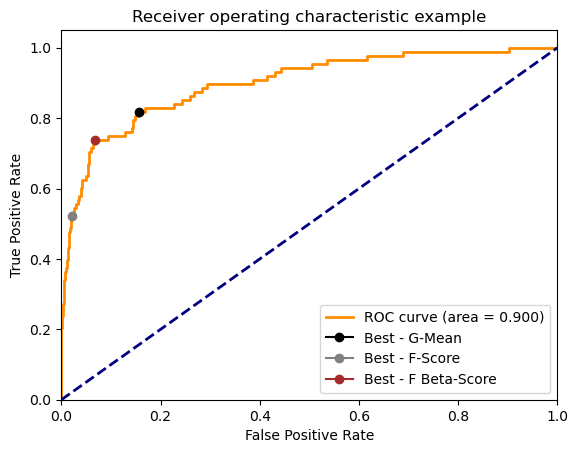

In [88]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.3f)' % roc_auc)
plt.plot(fpr[roc_gmean_ix], tpr[roc_gmean_ix], marker='o', color='black', label='Best - G-Mean')
plt.plot(fpr[roc_fscore_ix], tpr[roc_fscore_ix], marker='o', color='grey', label='Best - F-Score')
plt.plot(fpr[roc_fbetascore_ix], tpr[roc_fbetascore_ix], marker='o', color='brown', label='Best - F Beta-Score')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()

Best F-Score Threshold=0.658860, False Positive=0.021, True Positive=0.523, G-Mean=0.715
Best G-Mean Threshold=0.254814, False Positive=0.156, True Positive=0.818, G-Mean=0.831
Best F Beta-Score Threshold=0.443811, False Positive=0.067, True Positive=0.739, G-Mean=0.830


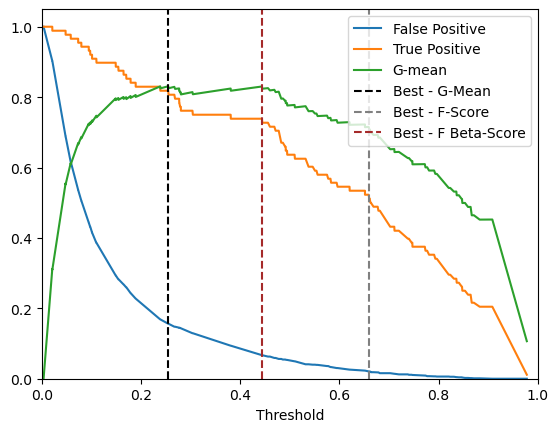

In [89]:
print('Best F-Score Threshold=%f, False Positive=%.3f, True Positive=%.3f, G-Mean=%.3f' % (roc_thresholds[roc_fscore_ix], fpr[roc_fscore_ix], tpr[roc_fscore_ix], gmeans[roc_fscore_ix]))
print('Best G-Mean Threshold=%f, False Positive=%.3f, True Positive=%.3f, G-Mean=%.3f' % (roc_thresholds[roc_gmean_ix], fpr[roc_gmean_ix], tpr[roc_gmean_ix], gmeans[roc_gmean_ix]))
print('Best F Beta-Score Threshold=%f, False Positive=%.3f, True Positive=%.3f, G-Mean=%.3f' % (roc_thresholds[roc_fbetascore_ix], fpr[roc_fbetascore_ix], tpr[roc_fbetascore_ix], gmeans[roc_fbetascore_ix]))

plt.plot(roc_thresholds[roc_thresholds <= 1], fpr[roc_thresholds <= 1], label='False Positive')
plt.plot(roc_thresholds[roc_thresholds <= 1], tpr[roc_thresholds <= 1], label='True Positive')
plt.plot(roc_thresholds[roc_thresholds <= 1], gmeans[roc_thresholds <= 1], label='G-mean')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.axvline(x = roc_thresholds[roc_gmean_ix], color="black", linestyle="--", label = 'Best - G-Mean')
plt.axvline(x = roc_thresholds[roc_fscore_ix], color="grey", linestyle="--", label = 'Best - F-Score')
plt.axvline(x = roc_thresholds[roc_fbetascore_ix], color="brown", linestyle="--", label = 'Best - F Beta-Score')
plt.xlabel("Threshold")
plt.legend()
plt.show()

Best F-Score Threshold=0.658860, F-Score=0.538, FBeta-Score=0.529, precision=0.554, recall=0.523
Best G-Mean Threshold=0.254814, F-Score=0.329, FBeta-Score=0.513, precision=0.206, recall=0.818
Best F Beta-Score Threshold=0.443811, F-Score=0.478, FBeta-Score=0.606, precision=0.353, recall=0.739


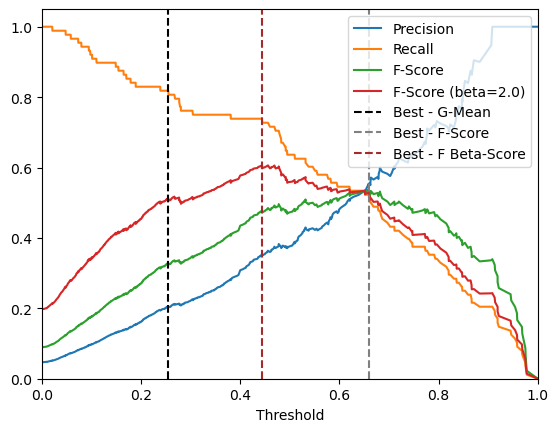

In [90]:
print('Best F-Score Threshold=%f, F-Score=%.3f, FBeta-Score=%.3f, precision=%.3f, recall=%.3f' % (pr_thresholds[fscore_ix], fscore[fscore_ix], fbetascore[fscore_ix], precision[fscore_ix], recall[fscore_ix]))
print('Best G-Mean Threshold=%f, F-Score=%.3f, FBeta-Score=%.3f, precision=%.3f, recall=%.3f' % (pr_thresholds[gmean_ix], fscore[gmean_ix], fbetascore[gmean_ix], precision[gmean_ix], recall[gmean_ix]))
print('Best F Beta-Score Threshold=%f, F-Score=%.3f, FBeta-Score=%.3f, precision=%.3f, recall=%.3f' % (pr_thresholds[fbetascore_ix], fscore[fbetascore_ix], fbetascore[fbetascore_ix], precision[fbetascore_ix], recall[fbetascore_ix]))

plt.plot(pr_thresholds[pr_thresholds <= 1], precision[pr_thresholds <= 1], label='Precision')
plt.plot(pr_thresholds[pr_thresholds <= 1], recall[pr_thresholds <= 1], label='Recall')
plt.plot(pr_thresholds[pr_thresholds <= 1], fscore[pr_thresholds <= 1], label='F-Score')
plt.plot(pr_thresholds[pr_thresholds <= 1], fbetascore[pr_thresholds <= 1], label=f'F-Score (beta={beta})')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.axvline(x = pr_thresholds[gmean_ix], color="black", linestyle="--", label = 'Best - G-Mean')
plt.axvline(x = pr_thresholds[fscore_ix], color="grey", linestyle="--", label = 'Best - F-Score')
plt.axvline(x = pr_thresholds[fbetascore_ix], color="brown", linestyle="--", label = 'Best - F Beta-Score')
plt.xlabel("Threshold")
plt.legend()
plt.show()

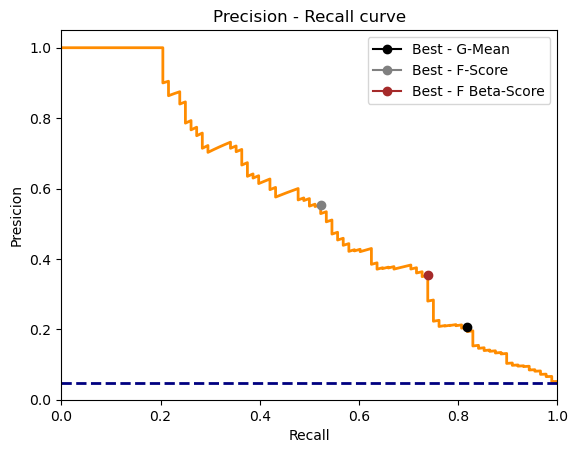

In [91]:
import matplotlib.pyplot as plt
import numpy as np

no_skill = len(y_true[y_true==1]) / len(y_true)
plt.figure()
lw = 2
plt.plot(recall, precision, color='darkorange', lw=lw)
plt.plot(recall[gmean_ix], precision[gmean_ix], marker='o', color='black', label='Best - G-Mean')
plt.plot(recall[fscore_ix], precision[fscore_ix], marker='o', color='grey', label='Best - F-Score')
plt.plot(recall[fbetascore_ix], precision[fbetascore_ix], marker='o', color='brown', label='Best - F Beta-Score')
plt.plot([0, 1], [no_skill, no_skill], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Presicion')
plt.title('Precision - Recall curve')
plt.legend(loc="upper right")
plt.show()